![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Samara Lima Cardoso

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

# <span style='color:red'>Laboratório 6: Redes Neurais Artificiais</span>
***

### Importação dos Pacotes

In [41]:
import os                                                 # operational system para manipulação de arquivos.
import cv2                                                # openCV para manipulação de imagens.
import numpy as np                                        # numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt                           # pyplot para plotagem de gráficos e imagens.
from sklearn.model_selection import train_test_split      # função para particionamento dos dados
from tensorflow.keras.models import Sequential            # classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.layers import Dense, Input, Dropout # camada de neurônios densamente conectados.
from tensorflow.keras.optimizers import SGD               # otimizador "Descida do Gradiente com Momento".
from tensorflow.keras.datasets import boston_housing      # dataset utilizado nesse experimento.

### Banco de Dados
* Vamos utilizar um banco de dados do catálogo de datasets do Keras, que é disponibilizado como uma função pronta;

* Cada instância do banco de dados corresponde a um conjunto de 13 valores referentes a características de subúrbios de Boston na década de 1970, a exemplo de taxa de crimes, imposto sobre propriedade, etc;

* Esses valores serão utilizados para calcular o valor mediano das residências no respectivo subúrbio em um problema de regressão, de modo que iremos mapear um vetor de entrada com 13 valores em um vetor de saída com 1 único elemento;

* O banco de dados contém 506 valores divididos em 404 instâncias de treino e 102 de teste;

* Uma descrição mais detalhada dos valores de entrada pode ser vista em http://lib.stat.cmu.edu/datasets/boston, onde os valores são descritos na ordem que aparecem;

### Organização do banco de dados

* Comumente os dados utilizados no treinamento de modelos de inteligência artificial reservam a primeira dimensão para controlar a amostra e espalham o tipo de dado utilizado nas demais dimensões do tensor. 


* Nesse caso, os nossos dados são vetores de características unidimensionais (1D), de modo que são organizados em tensores bidimensionais (2D) com formato: **dados.shape = (amostras, características)**
    * O i-ésimo exemplo pode ser acessado a partir de: **exemplo = dados[i]**
    * A j-ésima característica dos exemplos pode ser acessada a partir de: **caracteristica = dados[:, j]**
    * Porções do tensor podem ser acessadas utilizando fatiamento, por exemplo:
        * primeiros_5_exemplos = dados[:5]
        * caracteristicas_9a13 = dados[8:13]
        

* Lembrem-se que a contagem de índices em Python começa em 0 e só é inclusiva no primeiro elemento:
    * **:5** produz os índices **0, 1, 2, 3, 4** 
    * **8:13** produz os índices **8, 9, 10, 11, 12** 
        

* O banco de dados pode ser carregado utilizando:
    * **(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()**
    * train_data é um tensor com as entradas do conjunto de treino;
    * test_data é um tensor com as entradas do conjunto de teste;
    * train_targets é um tensor com os gabaritos do conjunto de treino;
    * test_targets é um tensor com os gabaritos do conjunto de teste;

## <span style='color:blue'>Questão 1: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) O código abaixo carrega o banco de dados, acesse alguns exemplos de treinamento e de teste e veja suas dimensões.
    * Use índices entre **[0, 404]** para os dados de treino e entre **[0, 102]** para os de teste.

* (b) Verifique as dimensões e as faixas de valores de cada característica nos vetores de entrada dos conjuntos de treino e de teste. A faixa de valores das características são semelhantes? E os dados de treino e de teste?**</span>
    * Encontre os valores mínimo/máximo além da média **(np.mean)** e da variância **(np.var)** de cada uma das 13 características.
    * Sugestão: leia sobre o parâmetro "axis" na documentação das funções **np.min**, **np.max** e **np.mean**.
* (c) Verifique as dimensões e as faixas de valores dos gabaritos dos conjuntos de treino e de teste. Os valores encontrados são semelhantes?

In [42]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [43]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 1 - letra (a)

print('Dimensões entrada treino:')
print(train_data.shape)
for i in range(2):
    print('casa treino %d ' %(i))
    for j in range(13):
        print('[', end='')
        print( train_data[i,j], end='')
        print(']', end=' ')
    print('\n')

print(train_data[50:60,12])

print('Dimensões entrada teste:')
print(test_data.shape)

print(test_data[50:60,12])

Dimensões entrada treino:
(404, 13)
casa treino 0 
[1.23247] [0.0] [8.14] [0.0] [0.538] [6.142] [91.7] [3.9769] [4.0] [307.0] [21.0] [396.9] [18.72] 

casa treino 1 
[0.02177] [82.5] [2.03] [0.0] [0.415] [7.61] [15.7] [6.27] [2.0] [348.0] [14.7] [395.38] [3.11] 

[ 9.29 18.05  4.73  9.51 12.03 14.37 17.64 21.52  2.98  5.33]
Dimensões entrada teste:
(102, 13)
[ 4.81 15.84 25.68 19.88  5.39  6.53 20.32  7.44  3.53  9.14]


|**Características dos Dados de Entrada**|**Descrição**|
|:-:|:-|
|**CRIM**|     <span style='color:red'>per capita crime rate by town</span>|
|**ZN**|       <span style='color:red'>proportion of residential land zoned for lots over 25,000 sq.ft.</span>|
|**INDUS**|    <span style='color:red'>proportion of non-retail business acres per town</span>|
|**CHAS**|     <span style='color:red'>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</span>|
|**NOX**|      <span style='color:red'>nitric oxides concentration (parts per 10 million)</span>|
|**RM**|       <span style='color:red'>average number of rooms per dwelling</span>|
|**AGE**|      <span style='color:red'>proportion of owner-occupied units built prior to 1940</span>|
|**DIS**|      <span style='color:red'>weighted distances to five Boston employment centres</span>|
|**RAD**|      <span style='color:red'>index of accessibility to radial highways</span>|
|**TAX**|      <span style='color:red'>full-value property-tax rate per \$10,000</span>|
|**PTRATIO**|  <span style='color:red'>pupil-teacher ratio by town</span>|
|**B**|        <span style='color:red'>$1000(B_k - 0.63)^2$ where Bk is the proportion of blacks by town</span>|
|**LSTAT**|    <span style='color:red'>\% lower status of the population</span>|

|**Características dos Dados de Saída**|**Descrição**|
|:-:|:-|
|**MEDV**|     <span style='color:red'>Median value of owner-occupied homes in \$1000's</span>|

In [44]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 1 - letra (b)



print('CONJUNTO TREINO')
print('minimo:')
print(train_data.min(axis=0), end='\n')
print('maximo:')
print(train_data.max(axis=0), end='\n')
print('media:')
print(train_data.mean(axis=0), end='\n')
print('variancia')
print(train_data.var(axis=0), end='\n')

print('\n\n\n\nCONJUNTO TESTE')
print('minimo:')
print(test_data.min(axis=0), end='\n')
print('maximo:')
print(test_data.max(axis=0), end='\n')
print('media:')
print(test_data.mean(axis=0), end='\n')
print('variancia')
print(test_data.var(axis=0), end='\n')

CONJUNTO TREINO
minimo:
[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
maximo:
[ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]
media:
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
variancia
[8.51798073e+01 5.63505796e+02 4.62790747e+01 5.80519067e-02
 1.37236180e-02 5.02551441e-01 7.78748377e+02 4.11156931e+00
 7.54741937e+01 2.76119724e+04 4.82969580e+00 8.83498510e+03
 5.24981521e+01]




CONJUNTO TESTE
minimo:
[1.3110e-02 0.0000e+00 1.2200e+00 0.0000e+00 3.9200e-01 4.8800e+00
 6.0000e+00 1.4655e+00 1.0000e+00 1.8700e+02 1.3000e+01 2.4650e+01
 1.9200e+00]
maximo:
[ 25.0461  90.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      21.2    3

In [45]:
# IMPLEMENTE SEU CÓDIGO AQUI -QUESTÃO 1 - letra (c)


print('Dimensões gabarito treino:')
print(train_targets.shape)
print('faixas de valores dos gabaritos treino')
print(train_targets)
print('CONJUNTO TREINO')
print('minimo:')
print(train_targets.min(axis=0), end='\n')
print('maximo:')
print(train_targets.max(axis=0), end='\n')
print('media:')
print(train_targets.mean(axis=0), end='\n')
print('variancia')
print(train_targets.var(axis=0), end='\n')


print('\n\n\n\nDimensões gabarito teste:')
print(test_targets.shape) 
print('faixas de valores dos gabaritos teste')
print(test_targets) 
print('CONJUNTO TESTE')
print('minimo:')
print(test_targets.min(axis=0), end='\n')
print('maximo:')
print(test_targets.max(axis=0), end='\n')
print('media:')
print(test_targets.mean(axis=0), end='\n')
print('variancia')
print(test_targets.var(axis=0), end='\n')



Dimensões gabarito treino:
(404,)
faixas de valores dos gabaritos treino
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30

## <span style='color:green'>Respostas da Questão 1:</span>

* (a) Foi realizado um for para a apresentação para deixar a vizualização melhor. Já analisaando os dados das colunas 50-60 e o atributo 13,LSTAT, de ambos banco de dados, podemos ver que no peuqueno intervalo pegado a variação entre os dados não é tão grande. 
* (b) Observando os dados mostrados , podemos ver que algumas características assumem diferentes faixas de valores.
* (c) Os valores de saida do treino variam entr 5 - 50, tendo sua media = 22.4 e variancia 82,6. Já os valores de saida do teste variam entre 5.6 - 50, tendo sua media = 23 e sua variancia 83.2. Logo com os dados vistos podemos afirma que os valores encontrados não são iguais, mas são proximos. 

### Pre-processamento dos dados

* Dados cujas características assumem diferentes faixas de valores muitas vezes são problemáticos para o aprendizado dos modelos e podem reduzir a velocidade de convergência ou até mesmo limitar as capacidades do modelo final.

* Nesse sentido, uma prática comum é a normalização dos dados antes do treinamento, que geralmente é feito por característica em forma da subtração da média e divisão pelo desvio padrão, o que faz com que os dados resultantes tenham média 0 e variância 1.

* Um ponto muito importante é que a normalização deve ser feita partir dos mesmos valores em todos os conjuntos, ou seja, os dados são normalizados segundo informações do conjunto de treino.

* Na prática não temos como calcular a média e variância real, mas se os dados de treino são significativos os seus valores são suficientes.

In [46]:
# Calcula a média do conjunto de treino
mean = train_data.mean(axis = 0)
# Calcula o desvio padrão do conjunto de treino
std = train_data.std(axis = 0)
# Normaliza os dados de treino
train_data -= mean
train_data /= std
# Normaliza os dados de teste
test_data -= mean
test_data /= std

## <span style='color:blue'>Questão 2: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Repita o item b da primeira questão para os dados normalizados. O que se observa quantos aos valores de média e variância para os dados de treino e teste? Comente a sua interpretação sobre as diferenças observadas.

In [47]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 2

print('CONJUNTO TREINO')
print('minimo:')
print(train_data.min(axis=0), end='\n')
print('maximo:')
print(train_data.max(axis=0), end='\n')
print('media:')
print(train_data.mean(axis=0), end='\n')
print('variancia')
print(train_data.var(axis=0), end='\n')

print('\n\n\n\nCONJUNTO TESTE')
print('minimo:')
print(test_data.min(axis=0), end='\n')
print('maximo:')
print(test_data.max(axis=0), end='\n')
print('media:')
print(test_data.mean(axis=0), end='\n')
print('variancia')
print(test_data.var(axis=0), end='\n')

CONJUNTO TREINO
minimo:
[-0.40510053 -0.48361547 -1.56469648 -0.25683275 -1.47126853 -3.81725032
 -2.36904226 -1.28750316 -0.97156928 -1.31131055 -2.67375227 -3.77110135
 -1.51966384]
maximo:
[9.23484718 3.72899018 2.44537425 3.89358447 2.67733525 3.46718635
 1.11048828 3.43740568 1.67588577 1.83609694 1.60353052 0.44807713
 3.48201936]
media:
[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
variancia
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]




CONJUNTO TESTE
minimo:
[-0.40436483 -0.48361547 -1.45297897 -0.25683275 -1.41151498 -1.95664382
 -2.25795529 -1.12184753 -0.97156928 -1.31732854 -2.49174024 -3.5122567
 -1.49344089]
maximo:
[2.30797686 3.30772962 2.44537425 3.89358447 2.67733525 3.5447704
 1.11048828 4.13583229 1.67588577 1.83609694 1.23950646 0.44807713
 2.65668643]
media:
[-0.0707286  -0.02435885  0.02358875  0.150

## <span style='color:green'>Resposta da Questão 2:</span>

*  Ao fazer a normalizaação foi alterado os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Isto é, faz com que as carateristicas não sumem  diferentes faixas de valores. Logo ao observar observa aos valores de média e variância para os dados de treino e teste é possivel perceber que eles não estão tão discrepantes. Isso ocoreu pois agora os intervalos são definidos por quantos desvios padrões esse valor está longe da média.

Agora vamos criar uma partição de validação a partir do conjunto de treino para realizar uma validação cruzada. Vamos utilizar a função **train_test_split**, que separa dados e os seus respectivos gabaritos segundo uma fração especificada.

In [48]:
# fração escolhida para separar o mesmo número de instâncias do conjunto de testes
data_frac = test_data.shape[0] / train_data.shape[0]

# criação do conjunto de validação
train_data, val_data, train_targets, val_targets = train_test_split(train_data,             # dados de treino
                                                                    train_targets,          # gabaritos de treino
                                                                    test_size = data_frac,  # proporção de dados p/ validação
                                                                    random_state = 42)      # semente de geração

print("Treino:", train_data.shape, train_targets.shape)
print("Validação:", val_data.shape, val_targets.shape)

Treino: (302, 13) (302,)
Validação: (102, 13) (102,)


### Construindo o modelo

Para construir o modelo usaremos a classe **Sequential**, que possibilita a construção de modelos sequenciais de forma bastante simples.
* A construção do modelo é feita a partir do seu instanciamento como objeto da classe seguido de chamadas à função **add()** para adicionar camadas.
* Como estamos construindo apenas Redes Neurais Artificiais por enquanto, vamos utilizar apenas as camadas **Dense** e **Input**.
    * A camada Input cria a entrada da rede com **Input(shape = None )**
        * shape corresponde ao formato do tensor de entrada, no nosso caso será o número de características do nosso banco de dados (13);
    * A camada Dense pode ser chamada com **Dense(n_unidades, activation = 'linear' )**
        * n_unidades corresponde ao número de neurônios da camada;
        * activation corresponde à função de ativação utilizada na camada;
* Algumas funções de ativação disponíveis são:
    * "linear"
    * "relu"
    * "sigmoid"
    * "softmax"
    * "tanh"


* Mais informações sobre a camada dense podem ser vistas em **https://keras.io/api/layers/core_layers/dense/**
* Mais informações sobre as ativações disponíveis podem ser vistas em **https://keras.io/api/layers/activations/**

## <span style='color:blue'>Questão 3: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) A função abaixo constroi um modelo de rede neural e utiliza a função summary() para apresentar um resumo das informações da rede neural produzida. Comente o que faz cada linha do código.
    * (opcional) Modifique parâmetros como o número de unidades de cada camada e/ou o formato do tensor de entrada e/ou o número de saídas.
* (b) Explique como o número de parâmetros de cada camada é calculado.
* (c) Nesse caso utilizamos uma saída com ativação linear. Qual seria a desvantagem de utilizar esse tipo de ativação nas demais camadas?

In [49]:
# COMENTE AS LINHAS DE CÓDIGO AQUI --> QUESTÃO 3 -letra (a)
def build_model( n_inputs, n_outputs ): # cria um função para construir um modelo
    '''construção do modelo de rede neural convolucional'''
    
    rede = Sequential() # iguala a rede a classe Sequential para a construção de modelos sequenciais
    rede.add( Dense(units = 64, activation = "relu", input_shape = (n_inputs,))) # cria uma camada densa com 64 neuronios e com a função de aivação relu e com o vetor de entrada input
    rede.add(Dense(units = 64, activation = "relu")) # cria uma camada densa com 64 neuronios e com a função de ativação relu
    rede.add(Dense(units = n_outputs ))
    return rede #retorna o modelo criado de acordo com os parametros dados

model = build_model(13, 1) #cria o modelo
model.summary() #apresenta uma tabela com um resumo do modelo

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                896       
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## <span style='color:green'>Respostas da Questão 3:</span>

* (b) O calculo da número de parâmetros de cada camada é feito da seguinte maneira: dados_saida*(dados_entrada+1) ex: parametro dense_4 = 64*(64+1)= 4160 paraametros
* (c) por ser uma ativação linear, o que acontece são trasfromações lineares, ou seja ela aplica  um fator multiplicador. Sua desvantagem é que por aplicar um fato multiplicador, sua derivada vai ser uma constante e não vai depender do valor de entrada.Isso torna o gradiente constante para cada etapa de backpropagation de modo que a etapa de descida do gradiente não tende a convergir para produzir um erro estável próximo a zero. Logo se as demais camadas tiverem uma ativação linear a saida da rede será apenas uma transformção linear da entrada.

Após a construção do modelo ele deve ser compilado antes que os parâmetros sejam treinados. Isso é feito utilizando a função **compile**:

* **model.compile( optimizer = opt, loss = fperdas, metrics = [] )** 
    * O optimizer é o algoritmo otimizador utilizado no lugar da descida do gradiente, o Keras oferece diversas opções;
        * Para treinar a partir da descida do gradiente utilizaremos o SGD (descida do gradiente com momento), mas setaremos esse parâmetro para 0.
        * **opt = SGD( learning_rate = taxa_de_aprendizagem, momentum = 0 )**
    * A função de perdas pode ser definida a partir do parâmetro loss, como este é um problema de regressão utilizaremos o erro médio quadrático: 
        * **loss = "mse"**
    * Podemos passar uma lista de métricas a serem computadas durante o treinamento, nesse caso utilizaremos o erro médio absoluto:
        * **metrics = ["mae"]**
        * Note que estamos passando uma lista com uma única métrica, mas outras poderiam ser adicionadas à lista.
         
         

* Algoritmos otimizadores populares são o Adam (**https://keras.io/api/optimizers/adam/**) e o RMSprop(**https://keras.io/api/optimizers/rmsprop/**)
* Mais informações sobre os otimizadores disponíveis podem ser vistas em **https://keras.io/api/optimizers/**
* Mais informações sobre as funções de perdas disponíveis podem ser vistas em **https://keras.io/api/losses/**
* Mais informações sobre as métricas disponíveis podem ser vistas em **https://keras.io/api/metrics/**



In [50]:
model = build_model(13, 1)
model.compile( optimizer = SGD(learning_rate = 0.001, momentum = 0.0), loss = "mse", metrics = ["mae"] )
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                896       
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Treinando o modelo

O treinamento é realizado a partir da função **fit**, que recebe dados de treino e de validação além de hiperparâmetros como o número de épocas e o tamanho dos lotes de dados (batchsize).

* **hist = model.fit(x = None, y = None, epochs = 1, batchsize = None, validation_data = None, verbose = "auto")**
    * x corresponde aos dados de treino;
    * y corresponde aos gabaritos de treino;
    * epochs corresponde ao número de épocas de treinamento;
    * batchsize corresponde ao tamanho dos lotes entregues à rede de cada vez;
    * validation_data corresponde a uma tupla ( val_data, val_targets ) com os dados de validação;
    * verbose indica como a função deve reportar os resultados:
        * 0: modo silencioso, nenhum retorno em formato de texto;
        * 1: retorno a cada época e barra de progresso;
        * 2: retorno a cada época sem barra de progresso;
    * hist é um dicionário de retorno com os valores de loss e das métricas computadas para treino e validação;

In [51]:
hist = model.fit(x = train_data, y = train_targets, epochs = 100, 
                 batch_size = 1, validation_data = ( val_data, val_targets ), 
                 verbose = 1)

Epoch 1/100
302/302 [==============================] - 2s 4ms/step - loss: 78.6912 - mae: 5.9697 - val_loss: 27.4482 - val_mae: 3.8657
Epoch 2/100
302/302 [==============================] - 1s 3ms/step - loss: 42.4712 - mae: 4.2385 - val_loss: 19.3610 - val_mae: 3.3603
Epoch 3/100
302/302 [==============================] - 1s 3ms/step - loss: 29.4871 - mae: 3.8907 - val_loss: 17.9482 - val_mae: 3.4496
Epoch 4/100
302/302 [==============================] - 1s 3ms/step - loss: 23.8323 - mae: 3.5486 - val_loss: 11.5199 - val_mae: 2.6948
Epoch 5/100
302/302 [==============================] - 1s 3ms/step - loss: 20.3403 - mae: 3.2530 - val_loss: 11.1842 - val_mae: 2.5645
Epoch 6/100
302/302 [==============================] - 1s 3ms/step - loss: 18.1645 - mae: 3.0207 - val_loss: 10.2956 - val_mae: 2.3962
Epoch 7/100
302/302 [==============================] - 1s 3ms/step - loss: 18.6267 - mae: 3.0014 - val_loss: 13.2003 - val_mae: 2.7543
Epoch 8/100
302/302 [==============================] - 

302/302 [==============================] - 1s 3ms/step - loss: 5.3944 - mae: 1.7120 - val_loss: 12.2696 - val_mae: 2.7092
Epoch 62/100
302/302 [==============================] - 1s 3ms/step - loss: 5.0726 - mae: 1.6998 - val_loss: 9.6999 - val_mae: 2.1623
Epoch 63/100
302/302 [==============================] - 1s 4ms/step - loss: 4.5421 - mae: 1.5103 - val_loss: 8.1827 - val_mae: 2.1350loss: 4.8309 - mae: 1
Epoch 64/100
302/302 [==============================] - 1s 5ms/step - loss: 5.6599 - mae: 1.6798 - val_loss: 13.4203 - val_mae: 2.3535
Epoch 65/100
302/302 [==============================] - 1s 4ms/step - loss: 6.5228 - mae: 1.7718 - val_loss: 15.6153 - val_mae: 2.3942
Epoch 66/100
302/302 [==============================] - 1s 4ms/step - loss: 4.8108 - mae: 1.6456 - val_loss: 10.5124 - val_mae: 2.2706
Epoch 67/100
302/302 [==============================] - 1s 3ms/step - loss: 4.3400 - mae: 1.5176 - val_loss: 13.3723 - val_mae: 2.3910
Epoch 68/100
302/302 [===========================

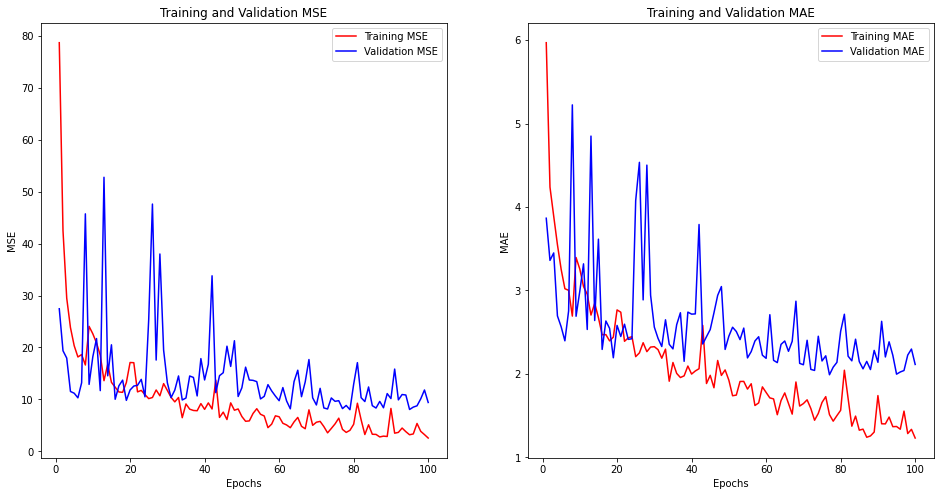

In [52]:
# plotando os resultados obtidos
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

history_dict = hist.history

# loss - MSE
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

# metrica - MAE
train_mae_values = history_dict["mae"]
val_mae_values = history_dict["val_mae"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training MSE")
ax.plot(epochs, val_loss_values, "b", label = "Validation MSE")
ax.set_title("Training and Validation MSE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_mae_values, "r", label = "Training MAE")
ax.plot(epochs, val_mae_values, "b", label = "Validation MAE")
ax.set_title("Training and Validation MAE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")
ax.legend()

## <span style='color:blue'>Questão 4: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* Comente os resultados obtidos nos gráficos acima. Houve overfitting? Se sim, o que pode ser feito para melhorar a qualidade do modelo?

## <span style='color:green'>Respostas da Questão 4:</span>

* Sofreu, pois o erro de validation ta acima dos de treino

## <span style='color:blue'>Questão 5: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* Modifique hiperparâmetros do modelo como o número de camadas, as funções de ativação, o número de épocas utilizadas e o tamanho dos lotes. Comente os resultados obtidos a partir das mudanças realizadas. Utilize várias células para dividir as etapas de construção dos modelos.

In [53]:
# IMPLEMENTE SEUS MODELOS AQUI --> QUESTÃO 5 (use várias células)

In [54]:
def build_model( n_inputs, n_outputs ): # cria um função para construir um modelo
    '''construção do modelo de rede neural convolucional'''
    
    rede = Sequential() # iguala a rede a classe Sequential para a construção de modelos sequenciais
    rede.add( Dense(units = 32, activation = "elu", input_shape = (n_inputs,))) # cria uma camada densa com 32 neuronios e com a função de aivação elu e com o vetor de entrada input
    rede.add(Dense(units = 32, activation = "elu")) # cria uma camada densa com 32 neuronios e com a função de ativação elu
    rede.add(Dense(units = 32, activation = "elu")) # cria uma camada densa com 32 neuronios e com a função de ativação elu
    rede.add(Dense(units = 32, activation = "elu")) # cria uma camada densa com 32 neuronios e com a função de ativação elu
    rede.add(Dense(units = n_outputs )) 
    return rede #retorna o modelo criado de acordo com os parametros dados

model = build_model(13, 1) #cria o modelo
model.summary() #apresenta uma tabela com um resumo do modelo

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 32)                448       
                                                                 
 dense_50 (Dense)            (None, 32)                1056      
                                                                 
 dense_51 (Dense)            (None, 32)                1056      
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dense_53 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [55]:
model = build_model(13, 1)
model.compile( optimizer = SGD(learning_rate = 0.0001, momentum = 0.0), loss = "mse", metrics = ["mae"] )
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                448       
                                                                 
 dense_55 (Dense)            (None, 32)                1056      
                                                                 
 dense_56 (Dense)            (None, 32)                1056      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [56]:
hist = model.fit(x = train_data, y = train_targets, epochs = 100, 
                 batch_size = 1, validation_data = ( val_data, val_targets ), 
                 verbose = 1)

Epoch 1/100
302/302 [==============================] - 3s 5ms/step - loss: 224.4448 - mae: 11.0683 - val_loss: 33.7149 - val_mae: 4.0171
Epoch 2/100
302/302 [==============================] - 1s 4ms/step - loss: 33.6805 - mae: 3.9186 - val_loss: 21.9545 - val_mae: 3.4871
Epoch 3/100
302/302 [==============================] - 1s 4ms/step - loss: 24.3893 - mae: 3.4631 - val_loss: 16.9484 - val_mae: 2.8503
Epoch 4/100
302/302 [==============================] - 1s 4ms/step - loss: 21.9982 - mae: 3.3440 - val_loss: 17.7828 - val_mae: 3.0833
Epoch 5/100
302/302 [==============================] - 1s 4ms/step - loss: 20.0461 - mae: 3.2221 - val_loss: 14.5617 - val_mae: 2.7628
Epoch 6/100
302/302 [==============================] - 1s 4ms/step - loss: 18.4951 - mae: 3.0679 - val_loss: 12.4411 - val_mae: 2.4215
Epoch 7/100
302/302 [==============================] - 1s 4ms/step - loss: 16.8184 - mae: 2.9598 - val_loss: 11.7142 - val_mae: 2.5564
Epoch 8/100
302/302 [==============================] 

302/302 [==============================] - 1s 3ms/step - loss: 5.8665 - mae: 1.8346 - val_loss: 10.6343 - val_mae: 2.3097
Epoch 62/100
302/302 [==============================] - 1s 3ms/step - loss: 5.3718 - mae: 1.7991 - val_loss: 15.3157 - val_mae: 2.7177
Epoch 63/100
302/302 [==============================] - 1s 3ms/step - loss: 5.7041 - mae: 1.8758 - val_loss: 13.8147 - val_mae: 2.4750
Epoch 64/100
302/302 [==============================] - 1s 3ms/step - loss: 6.0037 - mae: 1.8292 - val_loss: 11.4889 - val_mae: 2.3134
Epoch 65/100
302/302 [==============================] - 1s 3ms/step - loss: 5.5608 - mae: 1.7620 - val_loss: 12.1115 - val_mae: 2.4020
Epoch 66/100
302/302 [==============================] - 1s 4ms/step - loss: 5.7780 - mae: 1.8134 - val_loss: 11.2188 - val_mae: 2.3475
Epoch 67/100
302/302 [==============================] - 1s 4ms/step - loss: 5.4200 - mae: 1.7563 - val_loss: 12.0224 - val_mae: 2.3398- loss: 5.6927 - mae: 1
Epoch 68/100
302/302 [=======================

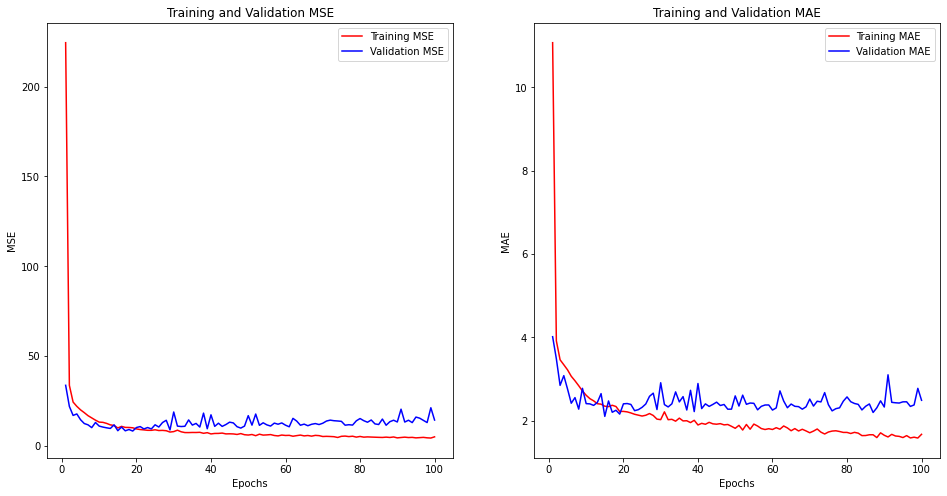

In [57]:
# plotando os resultados obtidos
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

history_dict = hist.history

# loss - MSE
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

# metrica - MAE
train_mae_values = history_dict["mae"]
val_mae_values = history_dict["val_mae"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training MSE")
ax.plot(epochs, val_loss_values, "b", label = "Validation MSE")
ax.set_title("Training and Validation MSE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_mae_values, "r", label = "Training MAE")
ax.plot(epochs, val_mae_values, "b", label = "Validation MAE")
ax.set_title("Training and Validation MAE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")
ax.legend()

## <span style='color:green'>Respostas da Questão 5:</span>

* Mudando as funções de ativação para elu, diminuindo o numero de neuronios e analisando os grafico, foi possivel verificar que a rede não sofreu overfitting.

### Teste do modelo

O teste do modelo pode ser realizado a partir da função **evaluate**, que recebe os dados de treino e retorna o valor de loss calculado para esse conjunto e os valores de cada métrica da lista fornecida durante a compilação do modelo. 

* É uma prática comum realizar ajustes no modelo com base no conjunto de validação e só utilizar o conjunto de testes após a definição dos hiperparâmetros definitivos.
* Como os hiperparâmetros são ajustados a partir dos resultados obtidos para o conjunto de validação, o modelo pode acabar. sobreajustando aos dados de validação, então é interessante mudar os dados desse conjunto com frequência.
* Para mudar os dados de validação basta alterar a semente na função train_test_split.
* Crie um novo modelo do zero após a realização de mudanças nos conjuntos de treino/validação.

In [58]:
test_mse, test_mae = model.evaluate( test_data, test_targets)

# observa-se que os dados de saída são normalizados em milhares de dólares, 
# então é necessário multiplicar por 1000 para obter os valores absolutos
print("Erro médio absoluto de teste: ${:.2f}".format(1000*test_mae))

4/4 [==============================] - 0s 6ms/step - loss: 22.9634 - mae: 2.8784
Erro médio absoluto de teste: $2878.40


## <span style='color:blue'>Questão 6: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Verifique novamente a faixa de valores dos gabaritos no banco de dados. Considerando a extensão dessa faixa de valores, pode-se dizer que as predições do modelo são significativas?

## <span style='color:green'>Resposta da Questão 6:</span>

* tendo o erro de 2878.40 , e sabendo que os valores vairam de 5000 a 50000, pode-se dizer que o erros terão mais impactos em valores menores pois eles serão quase 60% do valor real. Já em vaalores maiores o erra não comprometera tanto pois serão cerca de 6% do valor real. 

### Referências
* Chollet, Francois. Deep learning with Python. Simon and Schuster, 2017.

![gif3](https://user-images.githubusercontent.com/58775072/142712798-3c5ce76c-8d6f-4345-8d65-2be3f7aa2ae9.gif)